The goal of Module 2 is to obtain a feature set on which you can successfully train, optimize, and test a machine learning model for classifying taxi demand. 

To achieve this goal, you will convert net pickups to a categorical feature, ’Demand’, and use it as the response variable for the classification model(s) you will develop in Module 3. To create Demand, convert your numerical net pickup values to categorical values according to the following definitions:

·        Net Pickups < 0: ‘Low’ 

·        0 <= Net Pickups < 15: ‘Medium’

·        Net Pickups >= 15: ‘High’ 

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
from datetime import datetime, timedelta
import scipy.stats

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
df = pd.read_csv("clean.csv")

In [3]:
df

,passenger_count,trip_distance,pickup_location,fare_amount,extra,tip_amount,total_amount,duration,pickupday
0,2,12.74,JFK Airport,47.5,0.5,9.60,58.40,24.0,29
1,1,17.50,JFK Airport,52.0,0.0,7.00,65.13,32.0,1
2,2,18.50,JFK Airport,51.0,0.5,0.00,57.63,30.0,18
3,1,14.80,JFK Airport,41.0,0.0,0.00,41.80,29.0,13
4,1,14.30,JFK Airport,39.5,0.5,0.00,40.80,22.0,29
...,...,...,...,...,...,...,...,...,...
68563,1,1.69,Upper East Side,8.0,0.0,0.00,8.80,8.0,10
68564,1,1.80,Upper East Side,12.5,0.0,2.00,15.30,18.0,3
68565,5,1.54,Upper East Side,7.5,1.0,1.70,11.00,7.0,15
68566,1,0.78,Upper East Side,5.5,1.0,1.25,8.55,5.0,15


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68568 entries, 0 to 68567
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  68568 non-null  int64  
 1   trip_distance    68568 non-null  float64
 2   pickup_location  68568 non-null  object 
 3   fare_amount      68568 non-null  float64
 4   extra            68568 non-null  float64
 5   tip_amount       68568 non-null  float64
 6   total_amount     68568 non-null  float64
 7   duration         68568 non-null  float64
 8   pickupday        68568 non-null  int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 4.7+ MB


In [5]:
df.describe()

,passenger_count,trip_distance,fare_amount,extra,tip_amount,total_amount,duration,pickupday
count,68568.000000,6.856800e+04,68568.000000,68568.000000,68568.000000,68568.000000,68568.000000,68568.000000
mean,1.690424,5.194054e+01,13.839213,0.285746,1.760108,17.174227,14.549921,15.838000
std,1.346843,1.267113e+04,13.059612,0.365959,2.775889,16.001486,36.983077,8.716985
min,0.000000,0.000000e+00,-52.000000,-1.000000,0.000000,-52.800000,0.000000,1.000000
25%,1.000000,1.000000e+00,6.500000,0.000000,0.000000,8.160000,6.000000,8.000000
50%,1.000000,1.700000e+00,9.000000,0.000000,1.000000,11.300000,10.000000,15.000000
75%,2.000000,3.400000e+00,14.500000,0.500000,2.160000,17.800000,17.000000,23.000000
max,6.000000,3.318000e+06,570.080000,1.000000,94.510000,590.380000,1440.000000,31.000000


In [6]:
df.columns

Index(['passenger_count', 'trip_distance', 'pickup_location', 'fare_amount', 'extra', 'tip_amount', 'total_amount', 'duration', 'pickupday'], dtype='object')

## Data Visualization

### Univariate Data Exploration

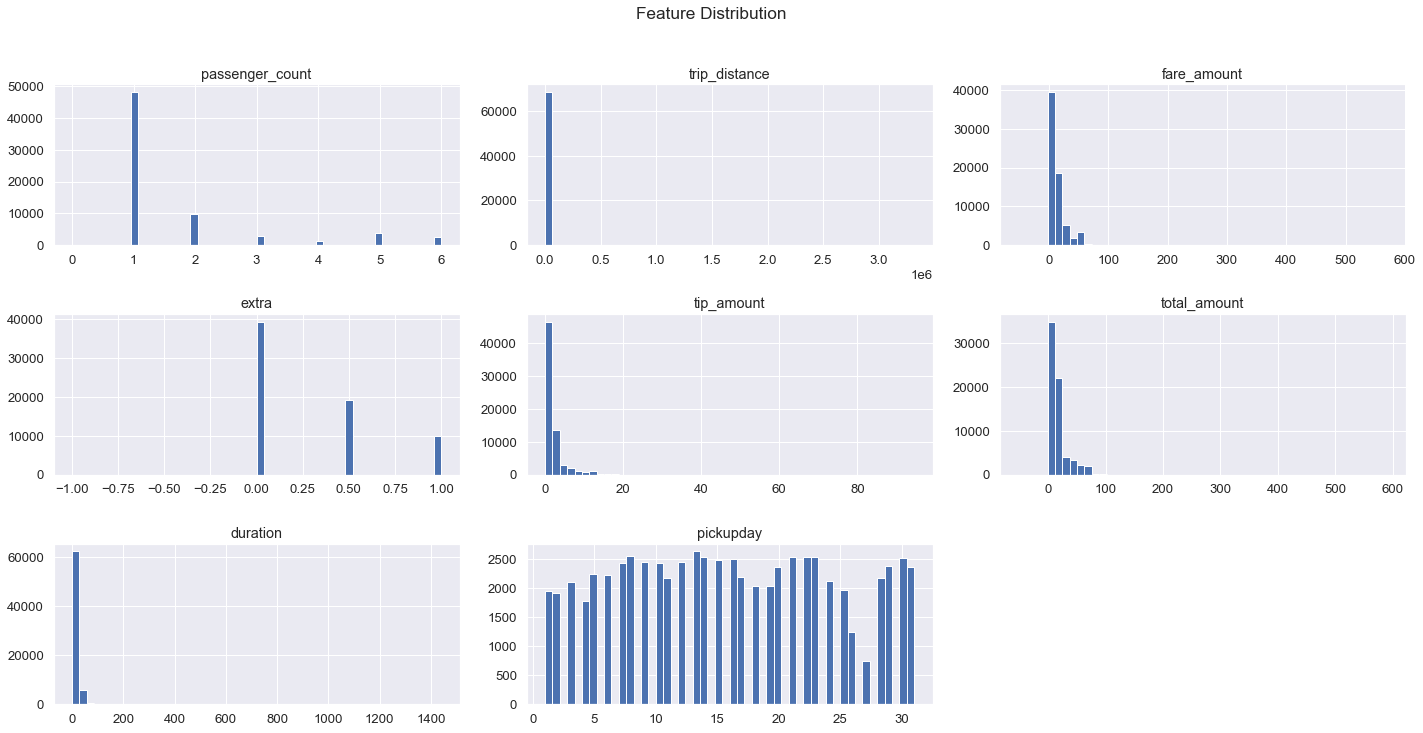

In [7]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

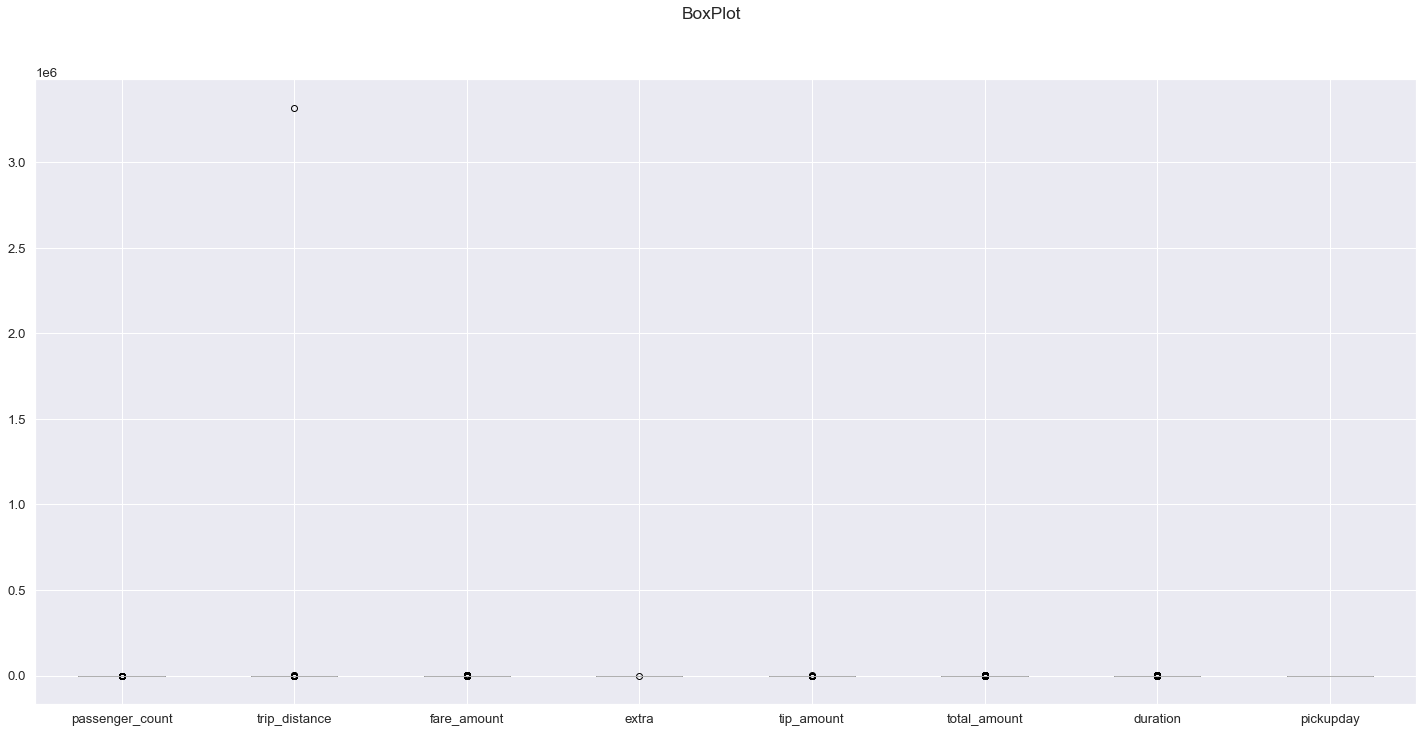

In [8]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

In [9]:
df.groupby("pickupday").sum()

,passenger_count,trip_distance,fare_amount,extra,tip_amount,total_amount,duration
pickupday,,,,,,,
1,3517,7526.93,27853.45,454.50,2820.88,33496.76,27184.0
2,3367,8191.55,29750.40,689.50,3141.60,36354.04,30767.0
3,3795,7852.29,29125.50,341.00,3162.88,35394.53,27058.0
4,3138,7822.61,27685.00,276.50,3210.69,33710.40,26061.0
5,3828,9353.73,33941.51,798.00,4128.27,42086.96,31468.0
6,3723,7951.61,30921.50,827.00,4117.21,38703.85,33135.0
7,4038,7809.73,31420.20,918.00,3907.01,39047.46,31350.0
8,4122,8139.78,33229.30,900.50,4306.20,41563.74,34304.0
9,4173,8569.19,33959.83,938.00,4409.72,42531.97,36761.0


### Passenger Counts ranges from 1 to 6, hence Low Pickup = 1-2; Medium Pickup = 3-4; High Pickup = 5-6

In [10]:
df

,passenger_count,trip_distance,pickup_location,fare_amount,extra,tip_amount,total_amount,duration,pickupday
0,2,12.74,JFK Airport,47.5,0.5,9.60,58.40,24.0,29
1,1,17.50,JFK Airport,52.0,0.0,7.00,65.13,32.0,1
2,2,18.50,JFK Airport,51.0,0.5,0.00,57.63,30.0,18
3,1,14.80,JFK Airport,41.0,0.0,0.00,41.80,29.0,13
4,1,14.30,JFK Airport,39.5,0.5,0.00,40.80,22.0,29
...,...,...,...,...,...,...,...,...,...
68563,1,1.69,Upper East Side,8.0,0.0,0.00,8.80,8.0,10
68564,1,1.80,Upper East Side,12.5,0.0,2.00,15.30,18.0,3
68565,5,1.54,Upper East Side,7.5,1.0,1.70,11.00,7.0,15
68566,1,0.78,Upper East Side,5.5,1.0,1.25,8.55,5.0,15


In [11]:
df["demand"] = pd.cut(x=df["passenger_count"],bins=3,labels=['low','medium','high'])

In [12]:
df

,passenger_count,trip_distance,pickup_location,fare_amount,extra,tip_amount,total_amount,duration,pickupday,demand
0,2,12.74,JFK Airport,47.5,0.5,9.60,58.40,24.0,29,low
1,1,17.50,JFK Airport,52.0,0.0,7.00,65.13,32.0,1,low
2,2,18.50,JFK Airport,51.0,0.5,0.00,57.63,30.0,18,low
3,1,14.80,JFK Airport,41.0,0.0,0.00,41.80,29.0,13,low
4,1,14.30,JFK Airport,39.5,0.5,0.00,40.80,22.0,29,low
...,...,...,...,...,...,...,...,...,...,...
68563,1,1.69,Upper East Side,8.0,0.0,0.00,8.80,8.0,10,low
68564,1,1.80,Upper East Side,12.5,0.0,2.00,15.30,18.0,3,low
68565,5,1.54,Upper East Side,7.5,1.0,1.70,11.00,7.0,15,high
68566,1,0.78,Upper East Side,5.5,1.0,1.25,8.55,5.0,15,low


In [13]:
#df.to_csv("finaltrain.csv",index=False)